<a href="https://colab.research.google.com/github/saadmarwan16/logistic_regression/blob/main/logistic_donut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 1000
D = 2

In [3]:
R_inner = 5
R_outer = 10

In [4]:
R1 = np.random.randn(N // 2) + R_inner
theta = 2*np.pi*np.random.random(N // 2)
X_inner = np.concatenate([[R1 * np.cos(theta)], [R1 * np.sin(theta)]]).T

In [5]:
R2 = np.random.randn(N // 2) + R_outer
theta = 2*np.pi*np.random.random(N // 2)
X_outer = np.concatenate([[R2 * np.cos(theta)], [R2 * np.sin(theta)]]).T

In [6]:
X = np.concatenate([X_inner, X_outer])
T = np.array([0]*(N // 2) + [1]*(N //2))

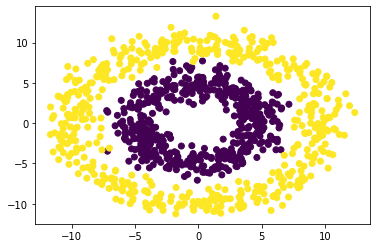

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=T)
plt.show()

In [8]:
ones = np.array([[1]*N]).T

In [9]:
r = np.zeros((N, 1))

for i in range(N):
    r[i] = np.sqrt(X[i, :].dot(X[i, :]))

Xb = np.concatenate((ones, r, X), axis=1)

w = np.random.random(D+2)
z = Xb.dot(w)

In [10]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [11]:
Y = sigmoid(z)

In [12]:
def cross_entropy(T, Y):
    E = 0

    for i in range(N):
        if T[i] == 1:
            E -= np.log(Y[i])
        else:
            E -= np.log(1 - Y[i])

    return E

In [13]:
learning_rate = 0.0001
error = list()

for i in range(5000):
    e = cross_entropy(T, Y)
    error.append(e)

    if i % 100 == 0:
        print(e)

    w += learning_rate * (np.dot((T - Y).T, Xb) - 0.01*w)

    Y = sigmoid(Xb.dot(w))

1267.4467069687264
540.2939151053665
413.59440539502765
334.57859239918395
282.0417642077576
245.01209276782978
217.63580517764814
196.60847081671707
179.95533898206605
166.43468610210127
155.23075920903014
145.78724149271727
137.7124327385908
130.7228674621222
124.60848059980448
119.21034842269448
114.40603610264387
110.09969549961542
106.21521486886641
102.69137982876113
99.47839036898108
96.53531113574402
93.82817610537963
91.32855992810775
89.01248725022435
86.85959029555097
84.85245118631799
82.97608339011116
81.21751910636895
79.56547815273196
78.01010014929712
76.5427263017826
75.15572037238182
73.8423208531705
72.59651816506816
71.41295206551946
70.28682548025297
69.21383176424719
68.19009300602929
67.2121074625071
66.27670458155443
65.3810063609198
64.52239402285873
63.69847916785386
62.90707871823323
62.146193081315765
61.413987057941426
60.70877310056197
60.02899658911798
59.37322284552373


Text(0.5, 1.0, 'Cross-entropy')

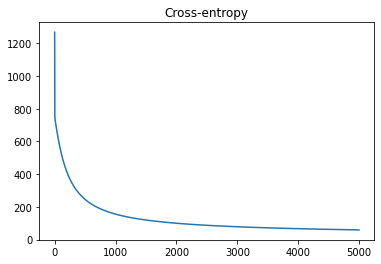

In [14]:
plt.plot(error)
plt.title('Cross-entropy')

In [15]:
print(f"Final w: {w}")
print(f"Final classification rate: {1 - np.abs(T - np.round(Y)).sum() / N}")

Final w: [-1.17984561e+01  1.59523149e+00  7.35838600e-03 -7.16739946e-03]
Final classification rate: 0.996
